In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from matplotlib.offsetbox import AnchoredText
#import time
#now = time.strftime('%d%m%Y%H%M%S')
from datetime import datetime

In [2]:
# get https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1 csv
ca_numtotal = pd.read_csv('covid19.csv', usecols=['prname', 'date', 'numtotal', 'numtoday'])

In [3]:
on_num = ca_numtotal[ca_numtotal['prname']=='Ontario']
on_num = on_num.reset_index(level=0, drop=True)
on_num['date'] = pd.to_datetime(on_num['date'], format='%d/%m/%Y')
on_num = on_num[-30:]
on_num_ave = on_num['numtoday'][-7:].sum() / len(on_num['numtoday'][-7:])
on_num_ave = on_num_ave.astype(int)

In [4]:
bc_num = ca_numtotal[ca_numtotal['prname']=='British Columbia']
bc_num = bc_num.reset_index(level=0, drop=True)
bc_num['date'] = pd.to_datetime(bc_num['date'], format='%d/%m/%Y')
bc_num = bc_num[-30:]
bc_num_ave = bc_num['numtoday'][-7:].sum() / len(bc_num['numtoday'][-7:])
bc_num_ave = bc_num_ave.astype(int)

In [5]:
on_num['sma_5day'] = on_num.iloc[:,3].rolling(window=5).mean()
on_num['sma_7day'] = on_num.iloc[:,3].rolling(window=7).mean()
on_num = on_num.reset_index(level=0, drop=True)

In [6]:
on_num = on_num[-23:]
on_num = on_num.reset_index(level=0, drop=True)

In [7]:
on_num.to_csv('on_num.csv')

In [8]:
on_dates_mav = on_num['date'].values
on_mavg_5day = on_num['sma_5day'].values
on_mavg_7day = on_num['sma_7day'].values
on_mavg_5day = on_mavg_5day.astype(int)
on_mavg_7day = on_mavg_7day.astype(int)

In [9]:
bc_num['sma_5day'] = bc_num.iloc[:,3].rolling(window=5).mean()
bc_num['sma_7day'] = bc_num.iloc[:,3].rolling(window=7).mean()
bc_num = bc_num[-23:]
bc_num = bc_num.reset_index(level=0, drop=True)
bc_num.to_csv('bc_num.csv')
bc_dates_mav = bc_num['date'].values
bc_mavg_5day = bc_num['sma_5day'].values
bc_mavg_7day = bc_num['sma_7day'].values
bc_mavg_5day = bc_mavg_5day.astype(int)
bc_mavg_7day = bc_mavg_7day.astype(int)

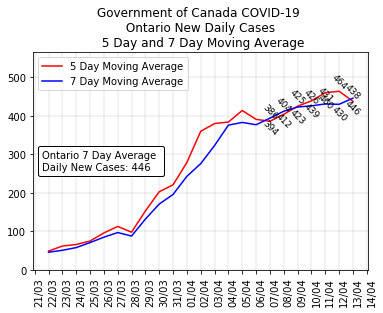

In [10]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=25) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(on_dates_mav, on_mavg_5day, color='red', label='5 Day Moving Average')  # Plot some data on the axes.
ax.plot(on_dates_mav, on_mavg_7day, color='blue', label='7 Day Moving Average')  # Plot some data on the axes.

ax.annotate(str(on_mavg_5day[-1]),xy=(on_dates_mav[-1],on_mavg_5day[-1]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_5day[-2]),xy=(on_dates_mav[-2],on_mavg_5day[-2]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=9)
ax.annotate(str(on_mavg_5day[-3]),xy=(on_dates_mav[-3],on_mavg_5day[-3]), horizontalalignment='center', verticalalignment='top', rotation=-45,  fontsize=9)
ax.annotate(str(on_mavg_5day[-4]),xy=(on_dates_mav[-4],on_mavg_5day[-4]), horizontalalignment='center', verticalalignment='top', rotation=-45,  fontsize=9)
ax.annotate(str(on_mavg_5day[-5]),xy=(on_dates_mav[-5],on_mavg_5day[-5]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=9)
ax.annotate(str(on_mavg_5day[-6]),xy=(on_dates_mav[-6],on_mavg_5day[-6]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=9)
ax.annotate(str(on_mavg_5day[-7]),xy=(on_dates_mav[-7],on_mavg_5day[-7]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=9)

ax.annotate(str(on_mavg_7day[-1]),xy=(on_dates_mav[-1],on_mavg_7day[-1]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-2]),xy=(on_dates_mav[-2],on_mavg_7day[-2]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-3]),xy=(on_dates_mav[-3],on_mavg_7day[-3]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-4]),xy=(on_dates_mav[-4],on_mavg_7day[-4]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-5]),xy=(on_dates_mav[-5],on_mavg_7day[-5]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-6]),xy=(on_dates_mav[-6],on_mavg_7day[-6]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(on_mavg_7day[-7]),xy=(on_dates_mav[-7],on_mavg_7day[-7]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)

plt.title('Government of Canada COVID-19 \n Ontario New Daily Cases \n 5 Day and 7 Day Moving Average')
plt.savefig('GOC_Canada_covid-19_Ontario_MovingAverage.png')

at = AnchoredText('Ontario 7 Day Average \nDaily New Cases: ' + str(on_num_ave),
                  prop=dict(size=10), frameon=True,
                  loc='center left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.legend(loc='upper left')

plt.ylim(0, on_num['sma_5day'].max()+100)
plt.show()

In [11]:
print(on_mavg_5day[-7:])
print(on_mavg_7day[-7:])
ave_5day = np.sum(on_mavg_5day[-7:]) / len(on_mavg_5day[-7:])
ave_7day = np.sum(on_mavg_7day[-7:]) / len(on_mavg_7day[-7:])
print(ave_5day.astype(int))
print(ave_7day.astype(int))

[386 404 425 439 460 464 438]
[394 412 423 426 431 430 446]
430
423


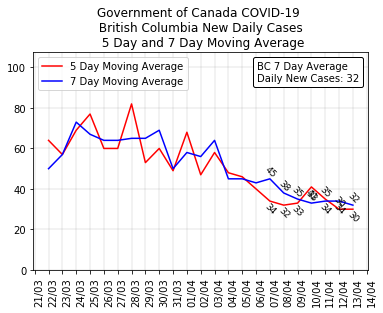

In [12]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=25) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(bc_dates_mav, bc_mavg_5day, color='red', label='5 Day Moving Average')  # Plot some data on the axes.
ax.plot(bc_dates_mav, bc_mavg_7day, color='blue', label='7 Day Moving Average')  # Plot some data on the axes.

ax.annotate(str(bc_mavg_5day[-1]),xy=(bc_dates_mav[-1],bc_mavg_5day[-1]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-2]),xy=(bc_dates_mav[-2],bc_mavg_5day[-2]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-3]),xy=(bc_dates_mav[-3],bc_mavg_5day[-3]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-4]),xy=(bc_dates_mav[-4],bc_mavg_5day[-4]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-5]),xy=(bc_dates_mav[-5],bc_mavg_5day[-5]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-6]),xy=(bc_dates_mav[-6],bc_mavg_5day[-6]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_5day[-7]),xy=(bc_dates_mav[-7],bc_mavg_5day[-7]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)

ax.annotate(str(bc_mavg_7day[-1]),xy=(bc_dates_mav[-1],bc_mavg_7day[-1]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-2]),xy=(bc_dates_mav[-2],bc_mavg_7day[-2]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-3]),xy=(bc_dates_mav[-3],bc_mavg_7day[-3]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-4]),xy=(bc_dates_mav[-4],bc_mavg_7day[-4]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-5]),xy=(bc_dates_mav[-5],bc_mavg_7day[-5]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-6]),xy=(bc_dates_mav[-6],bc_mavg_7day[-6]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(bc_mavg_7day[-7]),xy=(bc_dates_mav[-7],bc_mavg_7day[-7]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)

plt.title('Government of Canada COVID-19 \n British Columbia New Daily Cases \n 5 Day and 7 Day Moving Average')
plt.savefig('GOC_Canada_covid-19_BC_MovingAverage.png')

at = AnchoredText('BC 7 Day Average \nDaily New Cases: ' + str(bc_num_ave),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.legend(loc='upper left')

plt.ylim(0, bc_num['sma_5day'].max()+25)
plt.show()

In [13]:
print(bc_mavg_5day[-7:])
print(bc_mavg_7day[-7:])

[34 32 33 41 35 30 30]
[45 38 35 33 34 34 32]


In [14]:
bc_mavg_5day[-7:]

array([34, 32, 33, 41, 35, 30, 30])

In [15]:
on_num['numtoday'][-7:].sum()

3123.0